<a href="https://colab.research.google.com/github/akash-selvaraj/cvlab/blob/main/files/audio_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

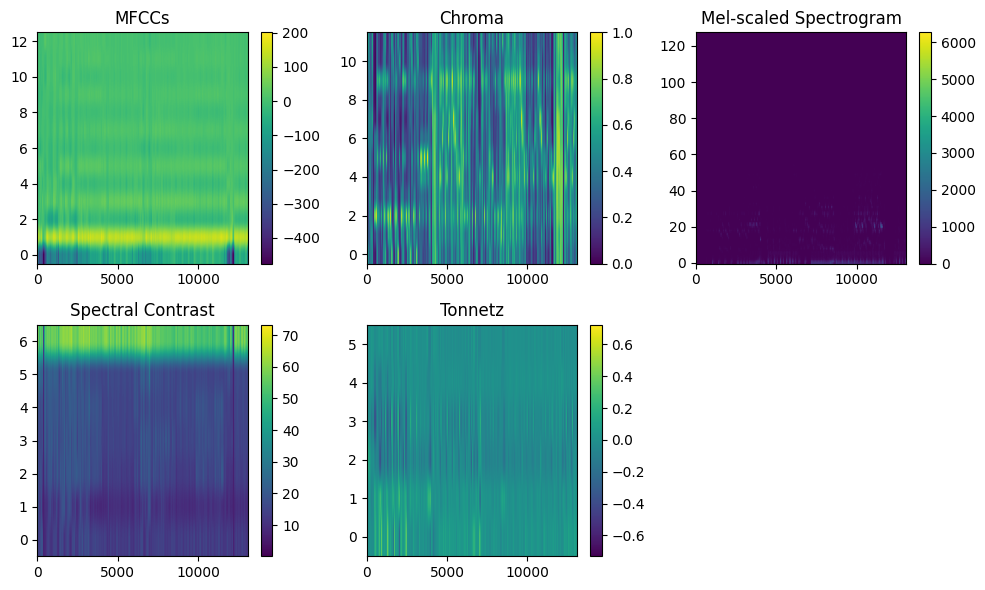

In [1]:
!pip install librosa
!pip install pydub

from pydub import AudioSegment
import librosa
import numpy as np
import matplotlib.pyplot as plt

def mp3_to_wav(mp3_file, wav_file):
    audio = AudioSegment.from_mp3(mp3_file)
    audio.export(wav_file, format="wav")

mp3_file = '/content/What Jhumka_ _ Rocky Aur Rani Kii Prem Kahaani _ Ranveer _ Alia _ Pritam _ Amitabh _ Arijit _ Jonita(MP3_160K).mp3'
wav_file = '/content/output.wav'
mp3_to_wav(mp3_file, wav_file)

def extract_features(audio_file, sr=44100):
    y, sr = librosa.load(audio_file, sr=sr)

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(y), sr=sr)

    return mfccs, chroma, mel_spectrogram, spectral_contrast, tonnetz

audio_file = wav_file
mfccs, chroma, mel_spectrogram, spectral_contrast, tonnetz = extract_features(audio_file)

plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title('MFCCs')

plt.subplot(2, 3, 2)
plt.imshow(chroma, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Chroma')

plt.subplot(2, 3, 3)
plt.imshow(mel_spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Mel-scaled Spectrogram')

plt.subplot(2, 3, 4)
plt.imshow(spectral_contrast, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Spectral Contrast')

plt.subplot(2, 3, 5)
plt.imshow(tonnetz, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Tonnetz')

plt.tight_layout()
plt.show()